# 准备工作

In [1]:
# 导入相关模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sea

%matplotlib inline

In [2]:
pima = pd.read_csv('./dataset/pima/pima.csv')

# 分析数据

In [4]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019CB0942908>,
      dtype=object)

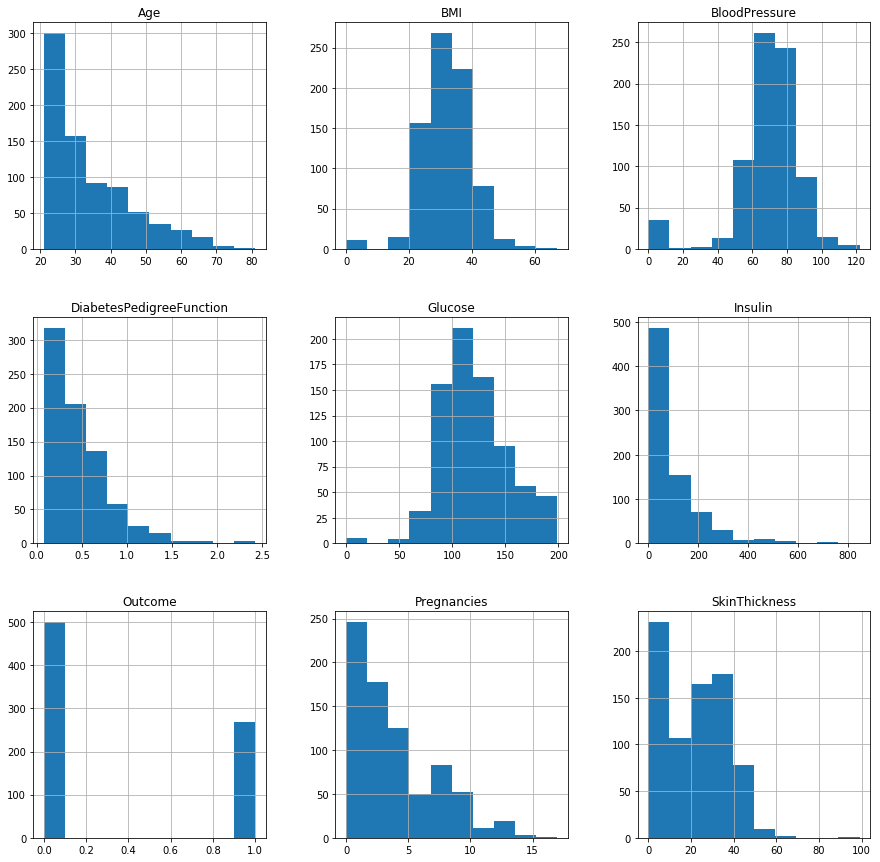

In [12]:
# 通过直方图画出每个特征对应的数量
pima.hist(figsize=(15,15) )

In [32]:
corr = pima.corr()
corr = np.abs(np.mat(corr))
np.fill_diagonal(corr, 0)# 只考虑不同的特征，相同特征相关性置为0
corr 

matrix([[0.        , 0.12945867, 0.14128198, 0.08167177, 0.07353461,
         0.01768309, 0.03352267, 0.54434123, 0.22189815],
        [0.12945867, 0.        , 0.15258959, 0.05732789, 0.33135711,
         0.22107107, 0.1373373 , 0.26351432, 0.4665814 ],
        [0.14128198, 0.15258959, 0.        , 0.20737054, 0.08893338,
         0.28180529, 0.04126495, 0.23952795, 0.06506836],
        [0.08167177, 0.05732789, 0.20737054, 0.        , 0.43678257,
         0.3925732 , 0.18392757, 0.11397026, 0.07475223],
        [0.07353461, 0.33135711, 0.08893338, 0.43678257, 0.        ,
         0.19785906, 0.18507093, 0.04216295, 0.13054795],
        [0.01768309, 0.22107107, 0.28180529, 0.3925732 , 0.19785906,
         0.        , 0.14064695, 0.03624187, 0.29269466],
        [0.03352267, 0.1373373 , 0.04126495, 0.18392757, 0.18507093,
         0.14064695, 0.        , 0.03356131, 0.17384407],
        [0.54434123, 0.26351432, 0.23952795, 0.11397026, 0.04216295,
         0.03624187, 0.03356131, 0.       

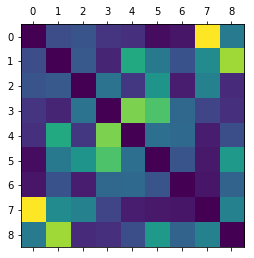

In [33]:
plt.matshow(corr) # 绘制相关性矩阵，越亮越相关

# 手动实现kNN

In [42]:
def split_data(data, ratio=0.8):
    index = np.random.permutation(data.index)
    sep = int(len(index)*0.8)
    training_data = data.loc[index[:sep]]
    test_data = data.loc[index[sep:]]
    return training_data, test_data

In [44]:
traing_data, test_data = split_data(pima)

In [46]:
traing_data.shape

(614, 9)

In [47]:
test_data.shape

(154, 9)

In [48]:
pima.shape

(768, 9)

## 标准化数据

In [132]:
# 使用修正后的标准化方法标准化数据
def normal(data):
    data_median = data.median()
    data_mad = data.mad()
    data_normal = (data - data_median)/(np.tile(data_mad, (data.shape[0], 1)))
    return data_normal, data_median, data_mad

In [133]:
# 计算欧几里得距离
def distances(vector1, vector2):
    return np.sqrt( np.sum(np.square(vector1-vector2)))

In [134]:
vector1 = pd.DataFrame([0 , 0])
vector2 = pd.DataFrame([3, 4])
distances(vector1, vector2)

0    5.0
dtype: float64

In [160]:
# 用距离函数预测k邻近
def predict(item, feature, training_data, k=3):
    # item : 待预测的数据
    # feature: 特征数
    # training_data： 训练集
    distance = []
    for index, traing in traing_data.iterrows():
        distance.append((distances(item.iloc[:feature], traing.iloc[:feature]), traing.iloc[feature:][0]))
    distance = sorted(distance, key= lambda i:i[0], reverse=False)[:k]
   # print(distance)
    predi = {}
    for d, outcome in distance: 
        if outcome not in predi:
            predi[outcome] = 1
        else:
            predi[outcome] += 1
   # print(predi)
    return sorted(predi.items(), key = lambda value:value[1], reverse=True)[0][0]

In [172]:
def test():
    training_data, test_data = split_data(pima) # 将数据拆分为训练集和测试集
    training_data, data_median, data_mad = normal(traing_data) #标准化训练集
    feature = training_data.shape[1]-1
    count = 0
    progress = 0
    for index, test in test_data.iterrows():
        progress += 1
        pre = predict(test, feature, training_data)
        print('{}%'.format(int(progress*100/test_data.shape[0])), end='\r')
        if pre  == test[feature:][0]:
            count += 1
    print()
    print('acc%f%%' % (int(count*100)/test_data.shape[0]))
    

In [ ]:
test()